In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [3]:
from tensorflow.keras.preprocessing import sequence
max_len = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [4]:
x_train.shape

(25000, 100)

In [5]:
y_test.shape

(25000,)

In [6]:
y_train.shape

(25000,)

In [7]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
y_test_one_hot.shape

(25000, 2)

In [10]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [12]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 64, input_length=max_len))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 32)           3104      
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 2)                 6402      
                                                                 
Total params: 649,506
Trainable params: 649,506
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [14]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
checkpoint_filepath = './temp/checkpoint_en_concat'
mc = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', 
                     save_weights_only=True, save_best_only=True)

In [15]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics='accuracy')

In [16]:
history = model.fit(x_train, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/20
157/157 [==============================] - 4s 19ms/step - loss: 0.6949 - accuracy: 0.5116 - val_loss: 0.6907 - val_accuracy: 0.5428
Epoch 2/20
157/157 [==============================] - 3s 18ms/step - loss: 0.6253 - accuracy: 0.6488 - val_loss: 0.5399 - val_accuracy: 0.7372
Epoch 3/20
157/157 [==============================] - 3s 18ms/step - loss: 0.4496 - accuracy: 0.7950 - val_loss: 0.4521 - val_accuracy: 0.7902
Epoch 4/20
157/157 [==============================] - 3s 18ms/step - loss: 0.3558 - accuracy: 0.8485 - val_loss: 0.4300 - val_accuracy: 0.8062
Epoch 5/20
157/157 [==============================] - 3s 18ms/step - loss: 0.3029 - accuracy: 0.8748 - val_loss: 0.4145 - val_accuracy: 0.8122
Epoch 6/20
157/157 [==============================] - 3s 19ms/step - loss: 0.2659 - accuracy: 0.8931 - val_loss: 0.3994 - val_accuracy: 0.8236
Epoch 7/20
157/157 [==============================] - 3s 18ms/step - loss: 0.2375 - accuracy: 0.9089 - val_loss: 0.4248 - val_accuracy: 0.8210

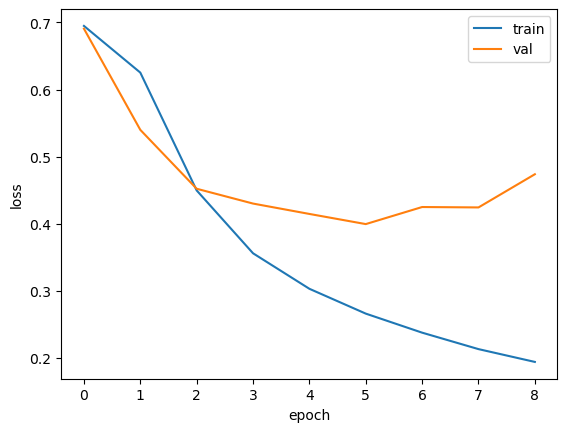

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

KeyError: 'acc'

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

In [ ]:
print('test_acc:', test_acc)